<a href="https://colab.research.google.com/github/lromeror/DataVisualization/blob/main/Visualizaciones%20Univariables/visualizaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import seaborn as sns
import plotly.express as px

In [35]:
df=pd.read_csv('https://raw.githubusercontent.com/lromeror/DataVisualization/main/Visualizaciones%20Univariables/titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [36]:
cantPasajero=df.groupby('Sex').agg({'PassengerId':'count'})
cantPasajero

,PassengerId
Sex,
female,314
male,577


##Graficos de Barra

<Axes: title={'center': 'Cantidad de Genero'}, xlabel='Sex'>

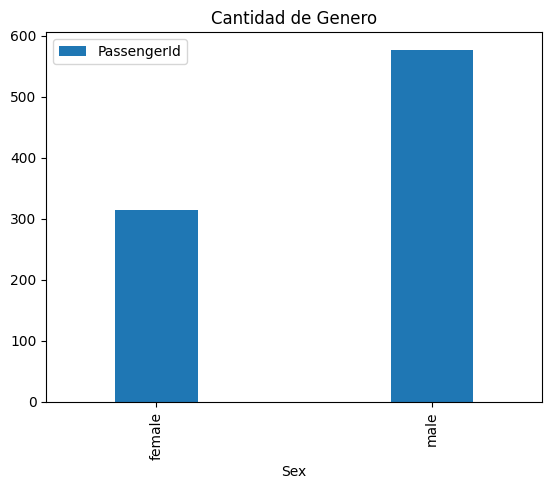

In [37]:
cantPasajero.plot.bar(y="PassengerId",width=0.3,title="Cantidad de Genero")

<Axes: xlabel='Sex', ylabel='PassengerId'>

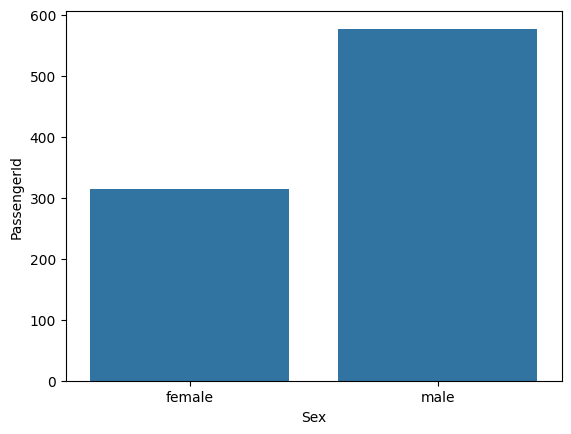

In [38]:
sns.barplot(x='Sex',y='PassengerId',data=cantPasajero)

## Grafico Pie

- Partes porcentuales de un todo
- No poner demasiadas categorias
- Mejor de Proporcion con el de magnitud
- No comparar con otr pieChar

In [42]:
cantPasajero

,PassengerId
Sex,
female,314
male,577


<Axes: title={'center': 'Cantidad de Genero'}, ylabel='PassengerId'>

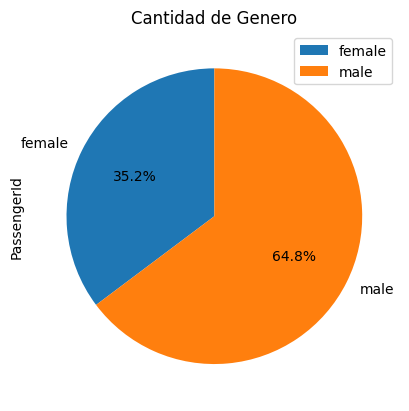

In [40]:
cantPasajero.plot.pie(y="PassengerId",autopct='%1.1f%%',title="Cantidad de Genero",startangle=90)


In [45]:
cantPasajero=cantPasajero.reset_index()

In [46]:
fig=px.pie(cantPasajero,values='PassengerId',names="Sex",title="Cantidad de Genero")
fig.show()

In [47]:
fig=px.pie(cantPasajero,values='PassengerId',names="Sex",title="Cantidad de Genero",hole=0.5)
fig.show()

##Diagrama de cajas

In [48]:
df=df.dropna(subset=['Age'],axis='index')

<Axes: title={'center': 'Age'}, xlabel='Sex'>

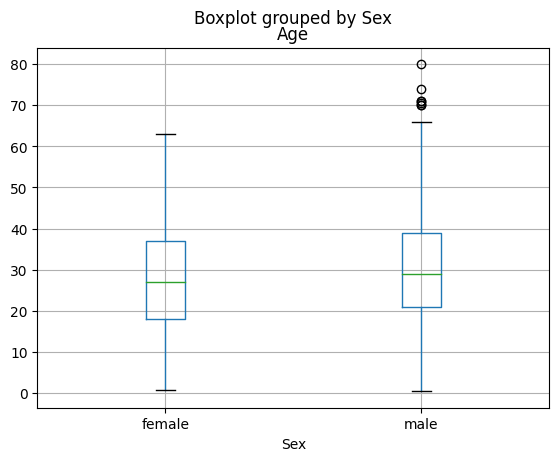

In [49]:
df.boxplot(column='Age',by='Sex')

<Axes: xlabel='Sex', ylabel='Age'>

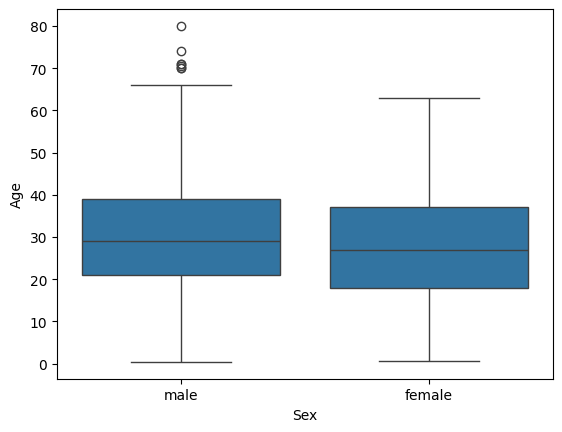

In [50]:
sns.boxplot(x='Sex',y='Age',data=df)

##Grafico de Violines

<Axes: xlabel='Sex', ylabel='Age'>

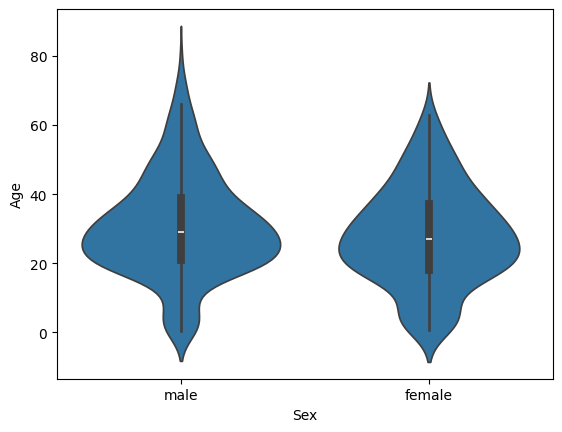

In [53]:
sns.violinplot(x='Sex',y='Age',data=df)

<Axes: xlabel='Sex', ylabel='Age'>

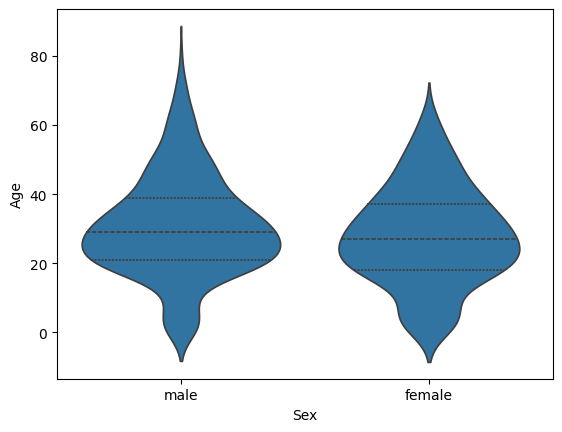

In [52]:
sns.violinplot(x='Sex',y='Age',data=df,inner='quartile')

##Histograma

- Forma de distribucion